In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
from itertools import combinations

# Carichiamo i dati d'interesse

In [23]:
num_cluster = 2

x_bound = int(155/5)

y_bound = int(155/5)

with open('./pickles/rese_total_3.pickle', 'rb') as handle:
    rese_total_3 = pickle.load(handle)

with open('./pickles/rese_total_4.pickle', 'rb') as handle:
    rese_total_4 = pickle.load(handle)

with open('./pickles/rese_total_6.pickle', 'rb') as handle:
    rese_total_6 = pickle.load(handle)

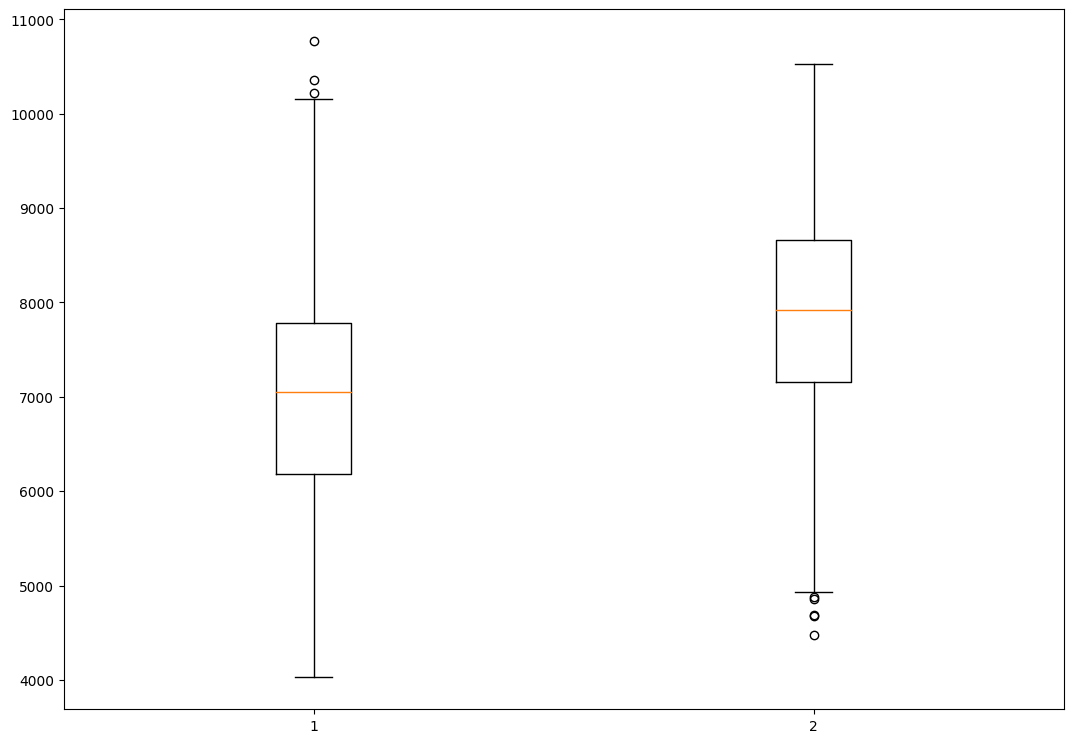

In [24]:
fig = plt.figure(figsize =(10, 7))

stampa = []
xplot = 13
yplot = 0
for a in range(0,num_cluster):
    stampa.append(rese_total_3[xplot,yplot,a])

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(stampa)

# show plot
plt.show()

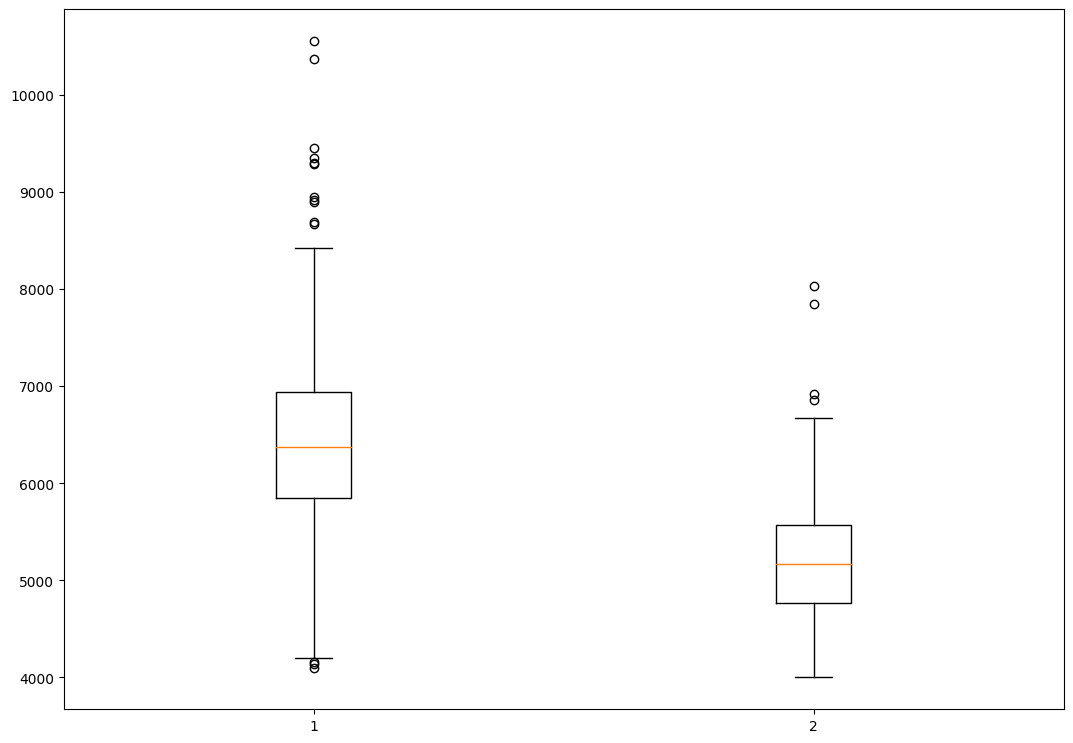

In [25]:
fig = plt.figure(figsize =(10, 7))

stampa = []
xplot = 13
yplot = 0
for a in range(0,num_cluster):
    stampa.append(rese_total_4[xplot,yplot,a])

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(stampa)

# show plot
plt.show()

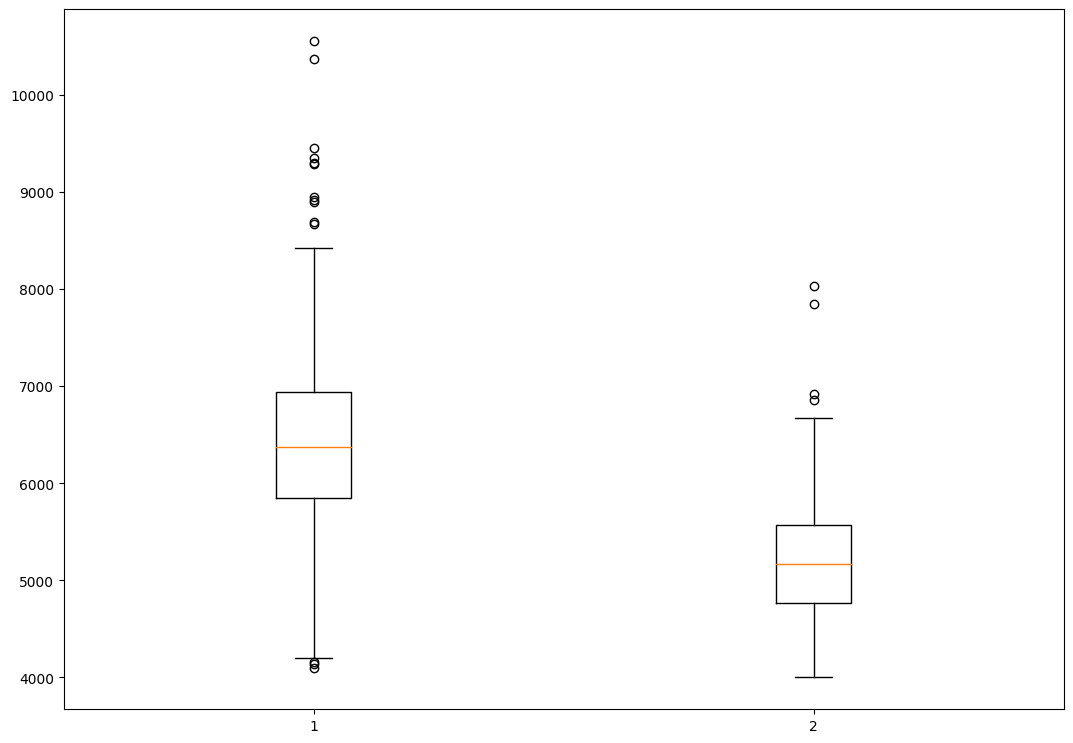

In [26]:
# Campo 6

fig = plt.figure(figsize =(10, 7))

stampa = []
xplot = 13
yplot = 0
for a in range(0,num_cluster):
    stampa.append(rese_total_4[xplot,yplot,a])

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(stampa)

# show plot
plt.show()

# Usiamo i dataframe per andare a calcolare i max e min dei vari boxplot

In [27]:
min_max_3 = np.zeros([x_bound,y_bound,num_cluster,2], dtype=float)

for a in range(x_bound):
    for b in range(y_bound):
        if(rese_total_3[a,b,0] is not None):
            for c in range(num_cluster):
                min_max_3[a,b,c,:] = [np.quantile(rese_total_3[a,b,c],q=0.25),np.quantile(rese_total_3[a,b,c],q=0.75)]


In [28]:
min_max_4 = np.zeros([x_bound,y_bound,num_cluster,2], dtype=float)

for a in range(x_bound):
    for b in range(y_bound):
        if(rese_total_4[a,b,0] is not None):
            for c in range(num_cluster):
                min_max_4[a,b,c,:] = [np.quantile(rese_total_4[a,b,c],q=0.25),np.quantile(rese_total_4[a,b,c],q=0.75)]


In [29]:
min_max_6 = np.zeros([x_bound,y_bound,num_cluster,2], dtype=float)

for a in range(x_bound):
    for b in range(y_bound):
        if(rese_total_6[a,b,0] is not None):
            for c in range(num_cluster):
                min_max_6[a,b,c,:] = [np.quantile(rese_total_6[a,b,c],q=0.25),np.quantile(rese_total_6[a,b,c],q=0.75)]


# Andiamo a fare il calcolo delle permutazioni, andando a confrontare i min e i max

In [30]:
perm_3 = list(combinations(range(num_cluster), 2))

difference_min_max_3 = np.zeros([x_bound,y_bound,2])

for a in range(x_bound):
    for b in range(y_bound):
        difference_array = []
        for c in perm_3:
            difference_array.append(abs(min_max_3[a,b,c[0],0]-min_max_3[a,b,c[1],0]))
        difference_min_max_3[a,b,0] = min(difference_array)
        difference_min_max_3[a,b,1] = max(difference_array)
            

In [31]:
perm_4 = list(combinations(range(num_cluster), 2))

difference_min_max_4 = np.zeros([x_bound,y_bound,2])

for a in range(x_bound):
    for b in range(y_bound):
        difference_array = []
        for c in perm_4:
            difference_array.append(abs(min_max_4[a,b,c[0],0]-min_max_4[a,b,c[1],0]))
        difference_min_max_4[a,b,0] = min(difference_array)
        difference_min_max_4[a,b,1] = max(difference_array)
            

In [32]:
perm_6 = list(combinations(range(num_cluster), 2))

difference_min_max_6 = np.zeros([x_bound,y_bound,2])

for a in range(x_bound):
    for b in range(y_bound):
        difference_array = []
        for c in perm_6:
            difference_array.append(abs(min_max_6[a,b,c[0],0]-min_max_6[a,b,c[1],0]))
        difference_min_max_6[a,b,0] = min(difference_array)
        difference_min_max_6[a,b,1] = max(difference_array)
            

# Plot delle differenze

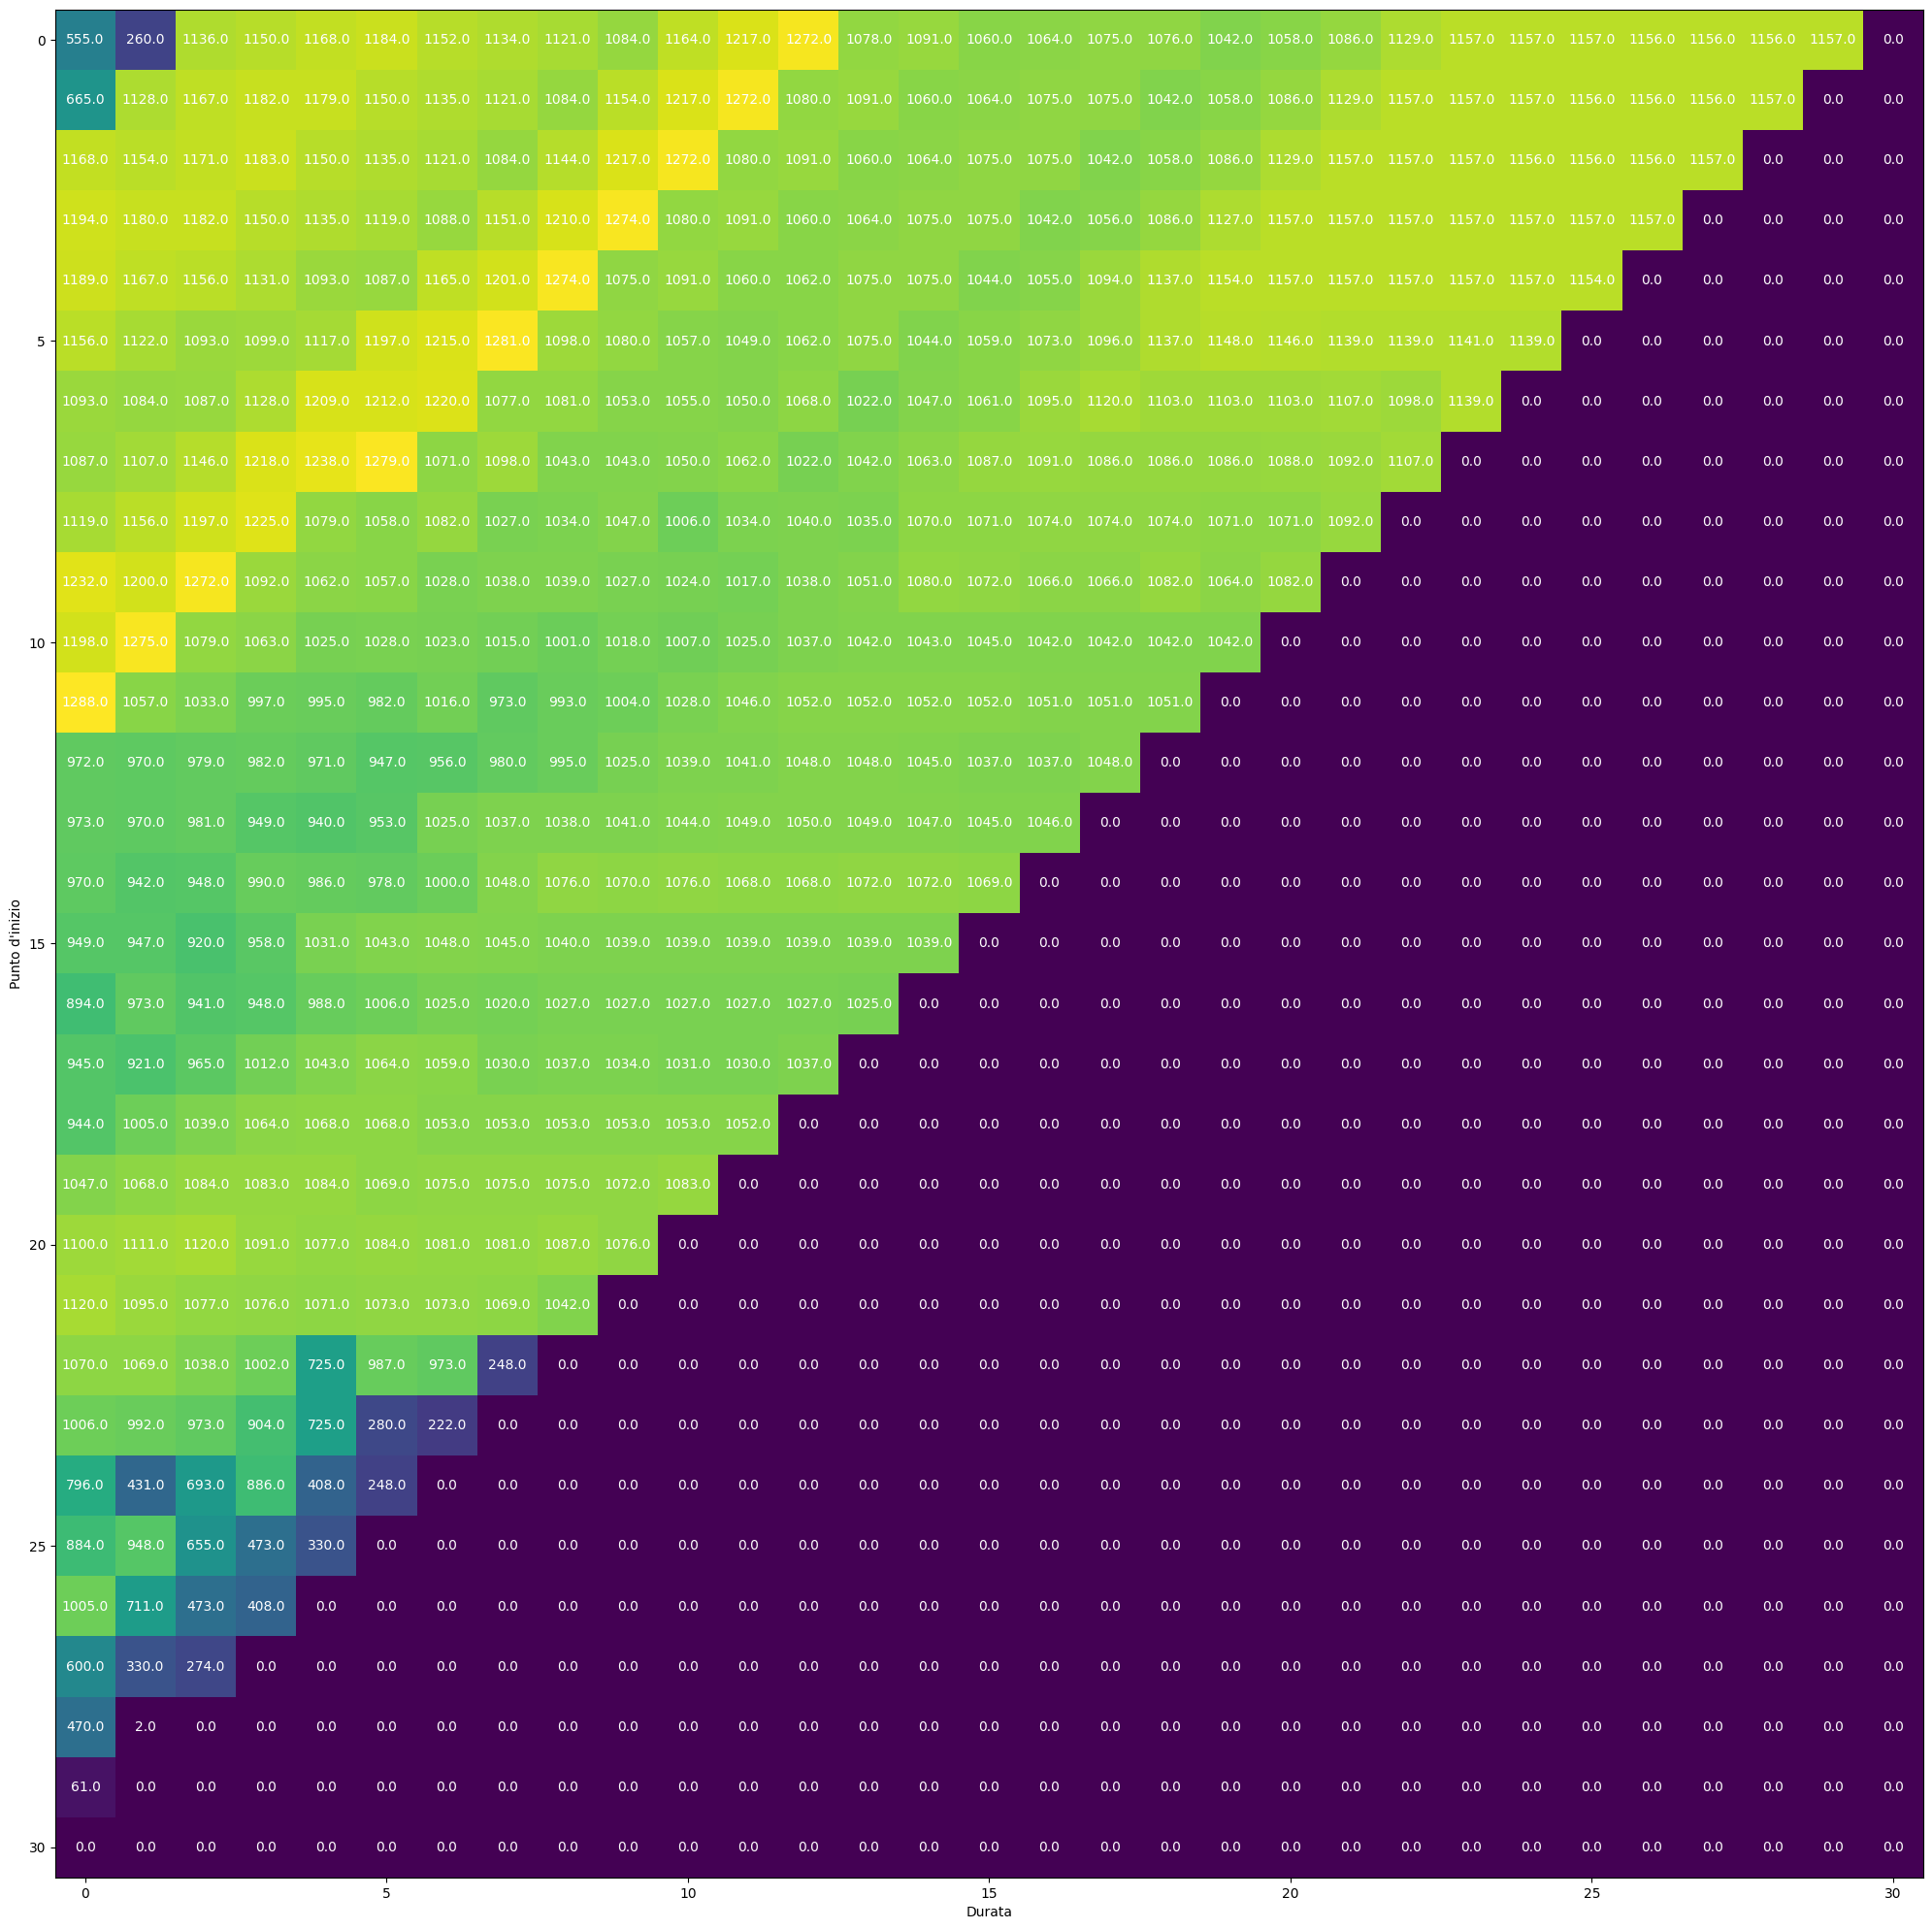

In [33]:
# Andiamo a stampare le deviazioni standard di tutti i cluster 

fig, ax = plt.subplots()
image = ax.imshow(difference_min_max_3[:,:,0])
plt.xlabel("Durata")
plt.ylabel("Punto d'inizio")
fig.set_size_inches(25,25)
for i in range(0,difference_min_max_3.shape[0]):
    for j in range(0,difference_min_max_3.shape[1]):
        c = np.round(difference_min_max_3[i,j,0],decimals=0)
        c1 = np.round(difference_min_max_3[i,j,1])
        ax.text(j, i, str(c), va='center', ha='center',color= 'white')
        #ax.text(j,(i+0.25),str(c1),va='center', ha='center',color= 'white')

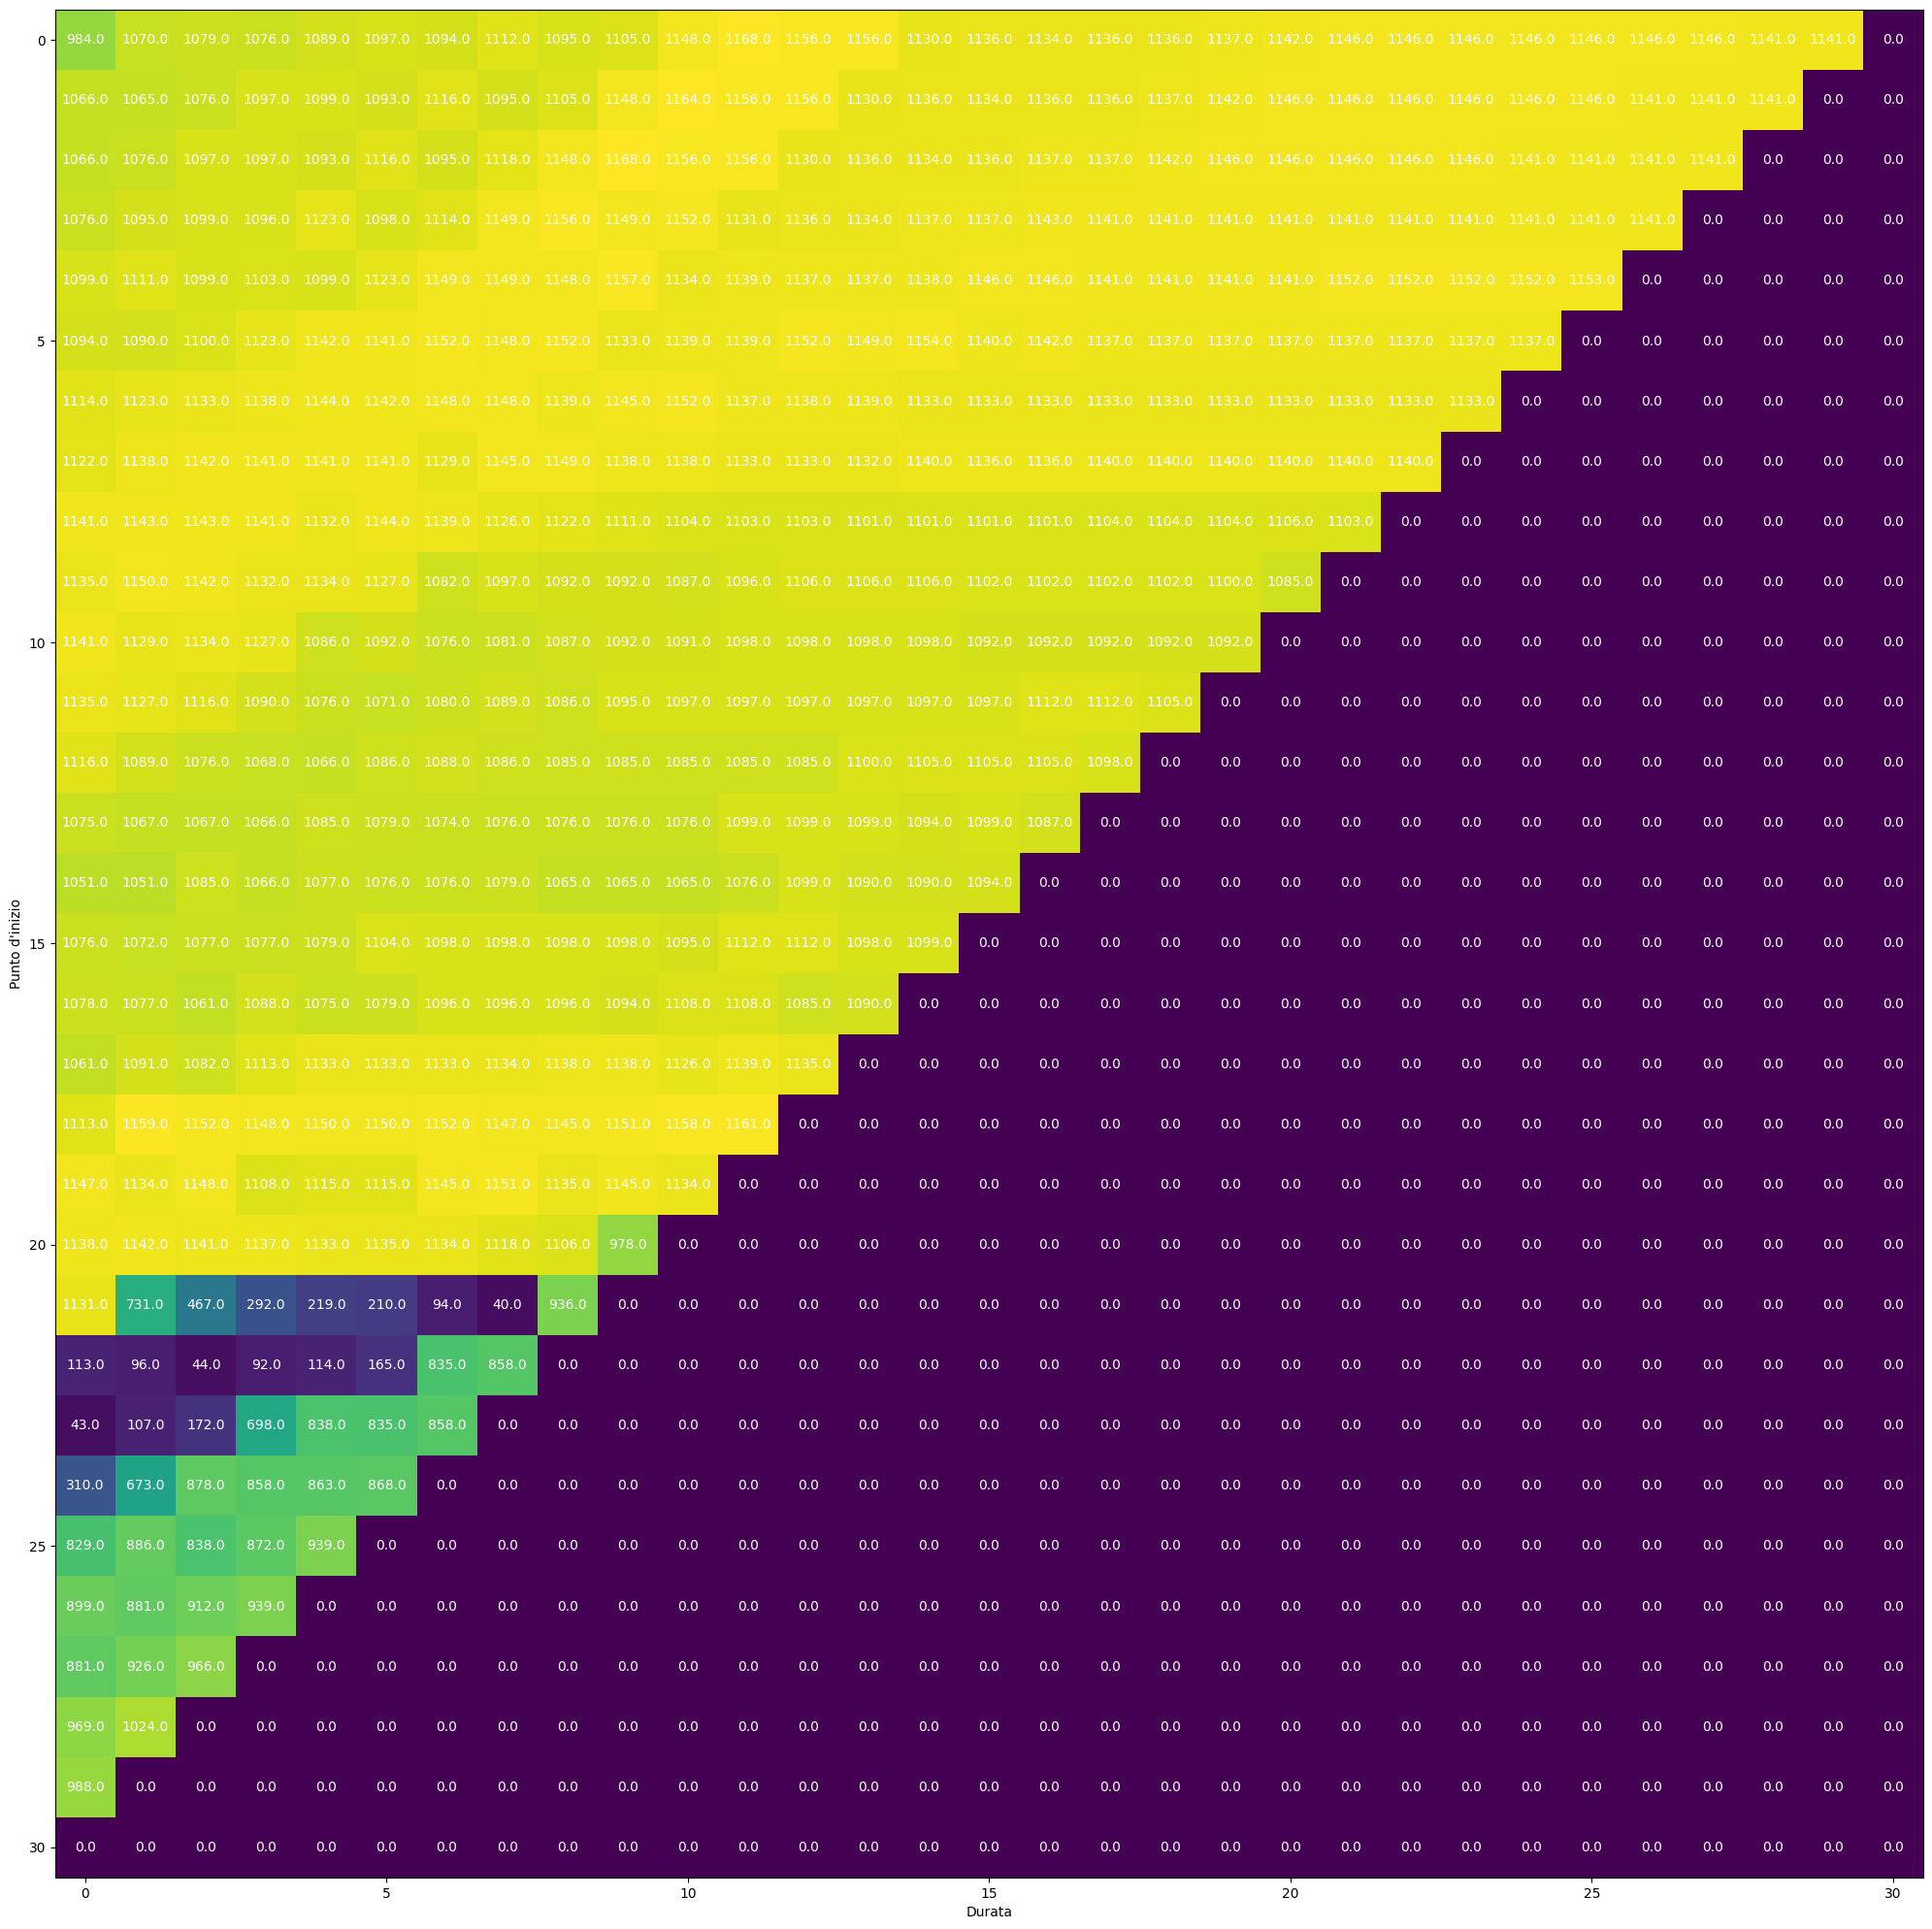

In [34]:
# Andiamo a stampare le deviazioni standard di tutti i cluster 

fig, ax = plt.subplots()
image = ax.imshow(difference_min_max_4[:,:,0])
plt.xlabel("Durata")
plt.ylabel("Punto d'inizio")
fig.set_size_inches(25,25)
for i in range(0,difference_min_max_4.shape[0]):
    for j in range(0,difference_min_max_4.shape[1]):
        c = np.round(difference_min_max_4[i,j,0],decimals=0)
        c1 = np.round(difference_min_max_4[i,j,1])
        ax.text(j, i, str(c), va='center', ha='center',color= 'white')
        #ax.text(j,(i+0.25),str(c1),va='center', ha='center',color= 'white')

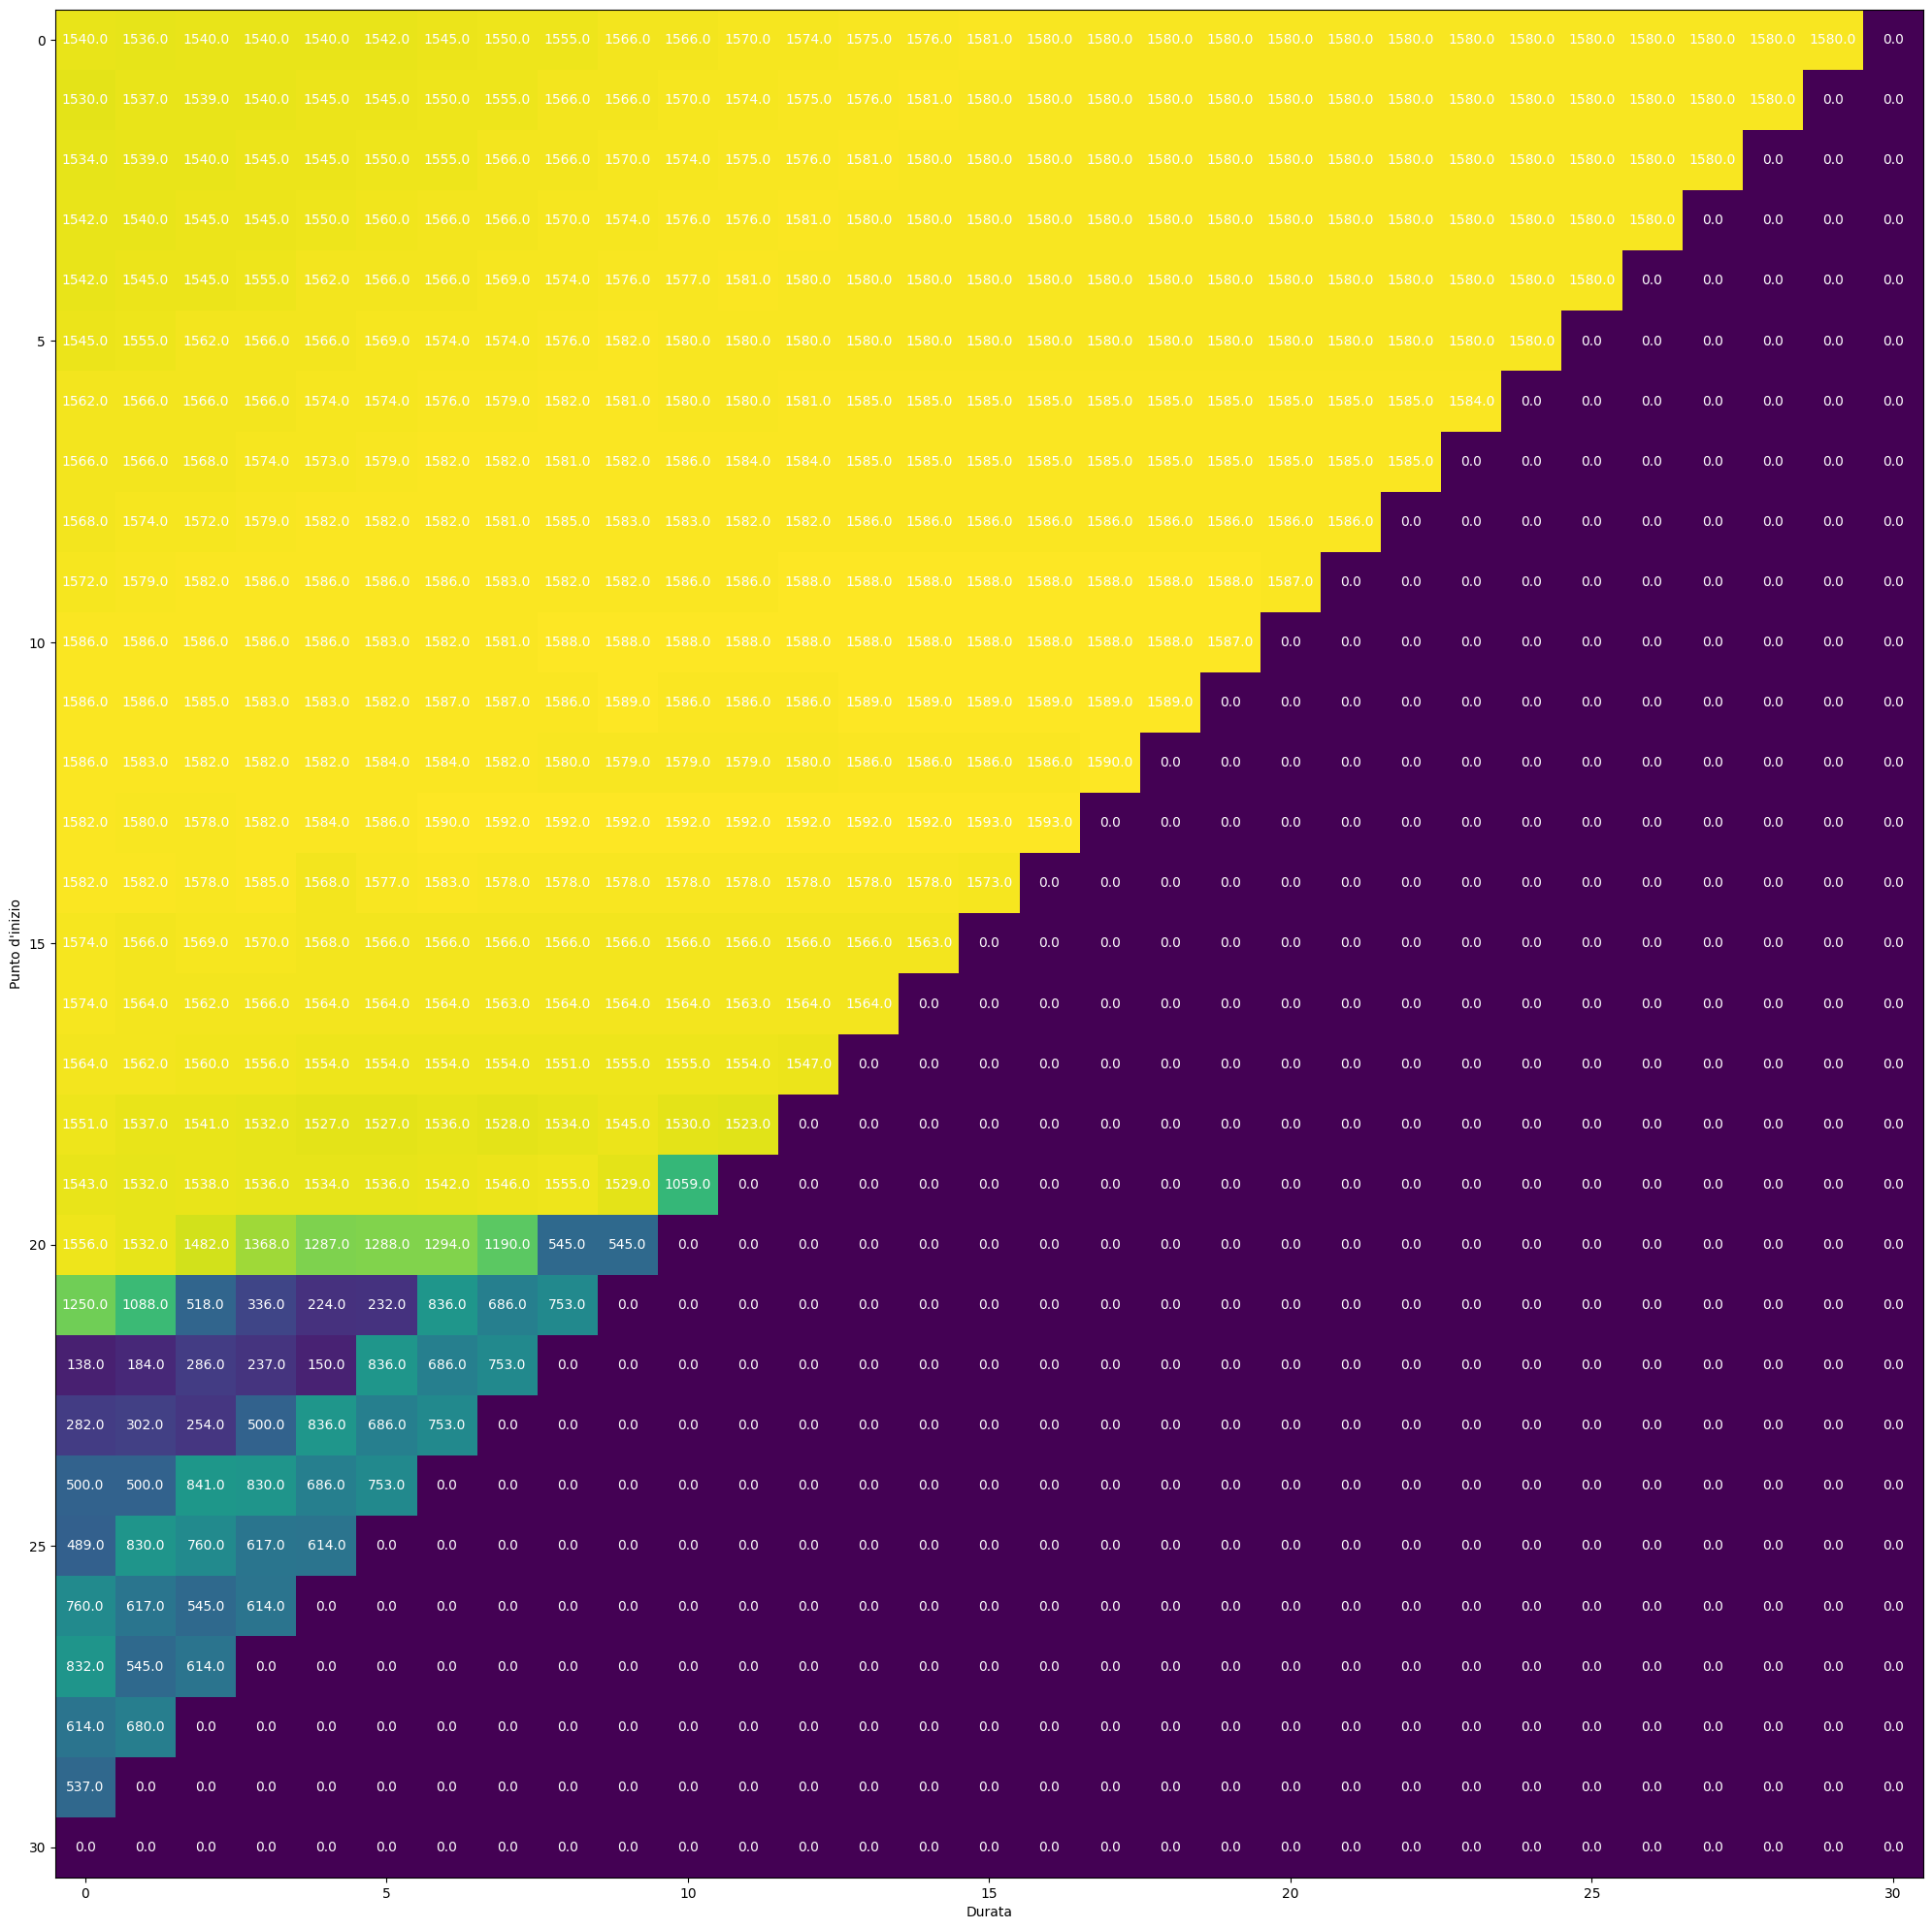

In [35]:
# Andiamo a stampare le deviazioni standard di tutti i cluster 

fig, ax = plt.subplots()
image = ax.imshow(difference_min_max_6[:,:,0])
plt.xlabel("Durata")
plt.ylabel("Punto d'inizio")
fig.set_size_inches(25,25)
for i in range(0,difference_min_max_6.shape[0]):
    for j in range(0,difference_min_max_6.shape[1]):
        c = np.round(difference_min_max_6[i,j,0],decimals=0)
        c1 = np.round(difference_min_max_6[i,j,1])
        ax.text(j, i, str(c), va='center', ha='center',color= 'white')
        #ax.text(j,(i+0.25),str(c1),va='center', ha='center',color= 'white')